In [146]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import random
import seaborn as sns


In [147]:
#Create dataframe from the Vehicle dataset
data_raw = pd.read_csv('/Users/sheetalchaudhari/Downloads/practical_application_II_starter/data/vehicles.csv')

In [148]:
#Get the list of columns, number of rows etc of the dataframe
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [149]:
#Drop null values from dataframe
data_raw = data_raw.dropna()

Text(0.0, 1.0, 'Car Sale Data')

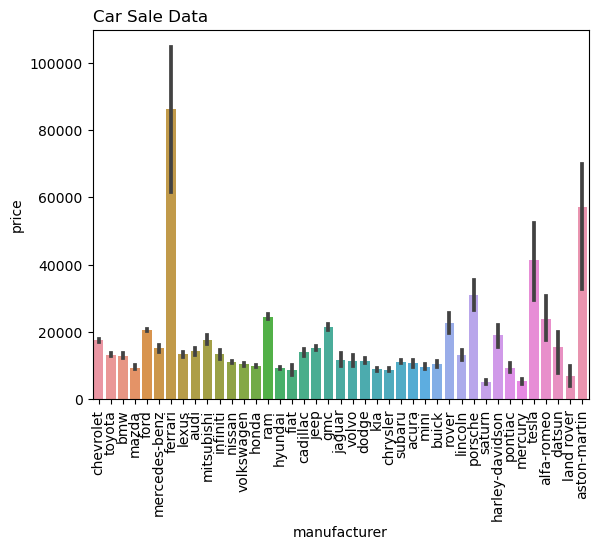

In [152]:
sns.barplot(data_raw, x = 'manufacturer', y = 'price')
plt.xticks(rotation=90)
plt.title('Car Sale Data', loc = 'left')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'chevrolet'),
  Text(1, 0, 'toyota'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'mazda'),
  Text(4, 0, 'ford'),
  Text(5, 0, 'mercedes-benz'),
  Text(6, 0, 'ferrari'),
  Text(7, 0, 'lexus'),
  Text(8, 0, 'audi'),
  Text(9, 0, 'mitsubishi'),
  Text(10, 0, 'infiniti'),
  Text(11, 0, 'nissan'),
  Text(12, 0, 'volkswagen'),
  Text(13, 0, 'honda'),
  Text(14, 0, 'ram'),
  Text(15, 0, 'hyundai'),
  Text(16, 0, 'fiat'),
  Text(17, 0, 'cadillac'),
  Text(18, 0, 'jeep'),
  Text(19, 0, 'gmc'),
  Text(20, 0, 'jaguar'),
  Text(21, 0, 'volvo'),
  Text(22, 0, 'dodge'),
  Text(23, 0, 'kia'),
  Text(24, 0, 'chrysler'),
  Text(25, 0, 'subaru'),
  Text(26, 0, 'acura'),
  Text(27, 0, 'mini'),
  Text(28, 0, 'buick'),
  Text(29, 0, 'rover'),
  Text(30, 0, 'lincoln'),
  Text(31, 0, 'porsche'),
  Text(32, 0, 'saturn'

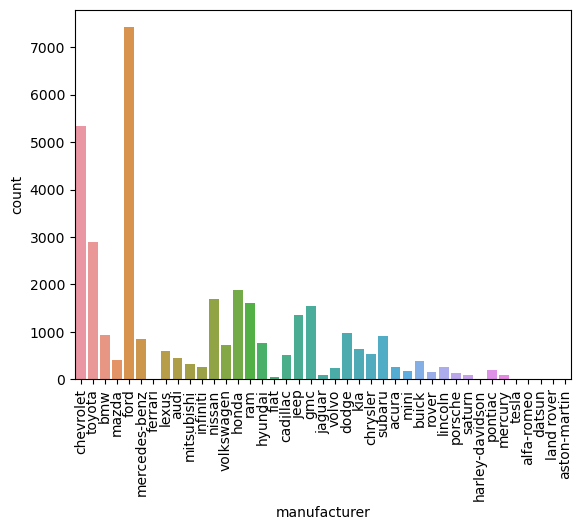

In [154]:
#Using countplot, determine the distribution of data per manufacturer
sns.countplot(data_raw, x="manufacturer")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'like new'),
  Text(1, 0, 'excellent'),
  Text(2, 0, 'fair'),
  Text(3, 0, 'good'),
  Text(4, 0, 'new'),
  Text(5, 0, 'salvage')])

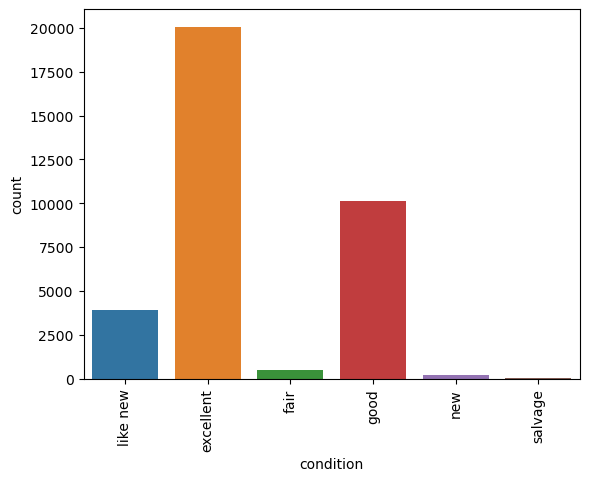

In [155]:
#Using countplot, determine the distribution of data per condition
sns.countplot(data_raw, x="condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'gas'),
  Text(1, 0, 'hybrid'),
  Text(2, 0, 'diesel'),
  Text(3, 0, 'other'),
  Text(4, 0, 'electric')])

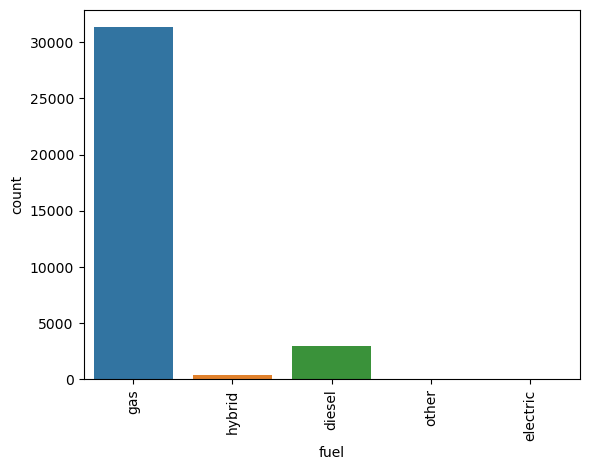

In [156]:
#Using countplot, determine the distribution of data per fuel
sns.countplot(data_raw, x="fuel")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'clean'),
  Text(1, 0, 'rebuilt'),
  Text(2, 0, 'salvage'),
  Text(3, 0, 'lien'),
  Text(4, 0, 'missing'),
  Text(5, 0, 'parts only')])

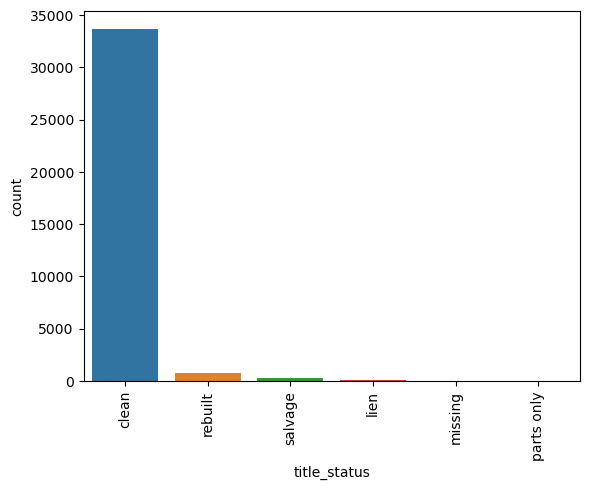

In [157]:
#Using countplot, determine the distribution of data per title_status
sns.countplot(data_raw, x="title_status")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'van'),
  Text(1, 0, 'sedan'),
  Text(2, 0, 'convertible'),
  Text(3, 0, 'truck'),
  Text(4, 0, 'coupe'),
  Text(5, 0, 'SUV'),
  Text(6, 0, 'hatchback'),
  Text(7, 0, 'wagon'),
  Text(8, 0, 'pickup'),
  Text(9, 0, 'other'),
  Text(10, 0, 'mini-van'),
  Text(11, 0, 'offroad'),
  Text(12, 0, 'bus')])

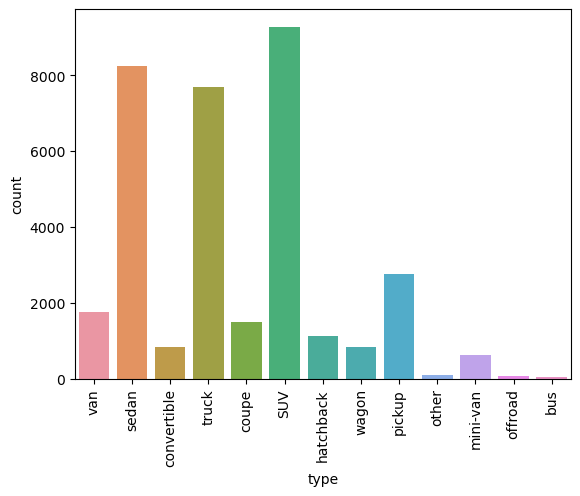

In [158]:
#Using countplot, determine the distribution of data per type
sns.countplot(data_raw, x="type")
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'rwd'), Text(1, 0, 'fwd'), Text(2, 0, '4wd')])

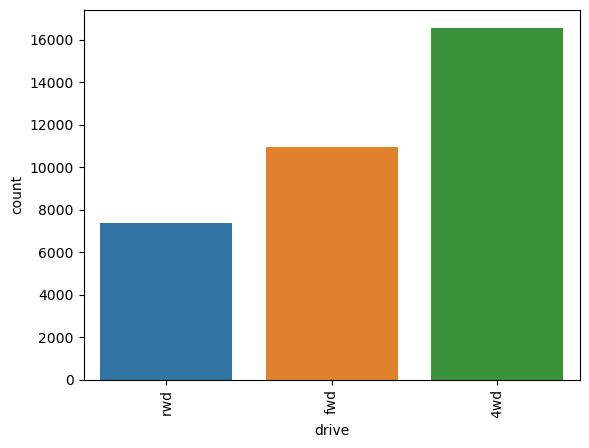

In [159]:
#Using countplot, determine the distribution of data per drive
sns.countplot(data_raw, x="drive")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'full-size'),
  Text(1, 0, 'compact'),
  Text(2, 0, 'mid-size'),
  Text(3, 0, 'sub-compact')])

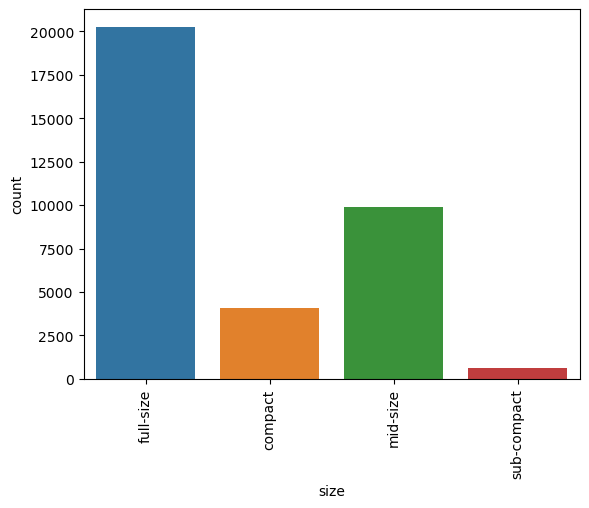

In [160]:
#Using countplot, determine the distribution of data per size
sns.countplot(data_raw, x="size")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'al'),
  Text(1, 0, 'ak'),
  Text(2, 0, 'az'),
  Text(3, 0, 'ar'),
  Text(4, 0, 'ca'),
  Text(5, 0, 'co'),
  Text(6, 0, 'ct'),
  Text(7, 0, 'dc'),
  Text(8, 0, 'de'),
  Text(9, 0, 'fl'),
  Text(10, 0, 'ga'),
  Text(11, 0, 'hi'),
  Text(12, 0, 'id'),
  Text(13, 0, 'il'),
  Text(14, 0, 'in'),
  Text(15, 0, 'ia'),
  Text(16, 0, 'ks'),
  Text(17, 0, 'ky'),
  Text(18, 0, 'la'),
  Text(19, 0, 'me'),
  Text(20, 0, 'md'),
  Text(21, 0, 'ma'),
  Text(22, 0, 'mi'),
  Text(23, 0, 'mn'),
  Text(24, 0, 'ms'),
  Text(25, 0, 'mo'),
  Text(26, 0, 'mt'),
  Text(27, 0, 'nc'),
  Text(28, 0, 'ne'),
  Text(29, 0, 'nv'),
  Text(30, 0, 'nj'),
  Text(31, 0, 'nm'),
  Text(32, 0, 'ny'),
  Text(33, 0, 'nh'),
  Text(34, 0, 'nd'),
  Text(35, 0, 'oh'),
  Text(36, 0, 'ok'),
  T

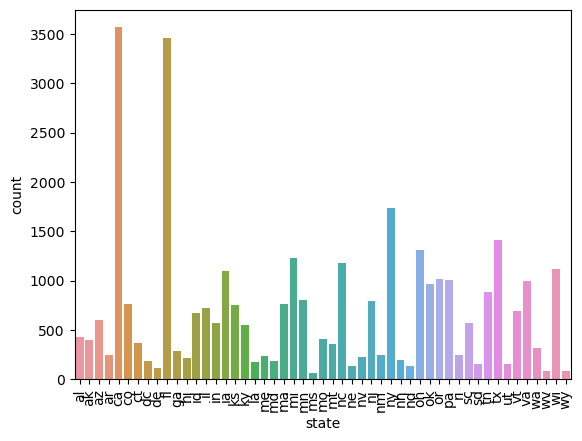

In [161]:
#Using countplot, determine the distribution of data per state
sns.countplot(data_raw, x="state")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'white'),
  Text(1, 0, 'blue'),
  Text(2, 0, 'silver'),
  Text(3, 0, 'red'),
  Text(4, 0, 'grey'),
  Text(5, 0, 'black'),
  Text(6, 0, 'brown'),
  Text(7, 0, 'green'),
  Text(8, 0, 'custom'),
  Text(9, 0, 'yellow'),
  Text(10, 0, 'orange'),
  Text(11, 0, 'purple')])

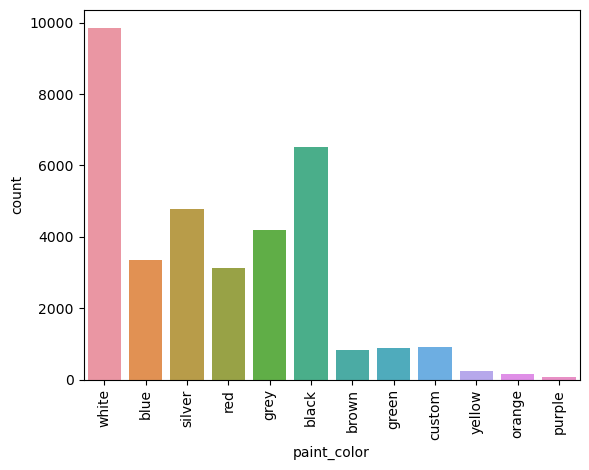

In [162]:
sns.countplot(data_raw, x="paint_color")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '6 cylinders'),
  Text(1, 0, '4 cylinders'),
  Text(2, 0, '8 cylinders'),
  Text(3, 0, '5 cylinders'),
  Text(4, 0, '10 cylinders'),
  Text(5, 0, '3 cylinders'),
  Text(6, 0, 'other'),
  Text(7, 0, '12 cylinders')])

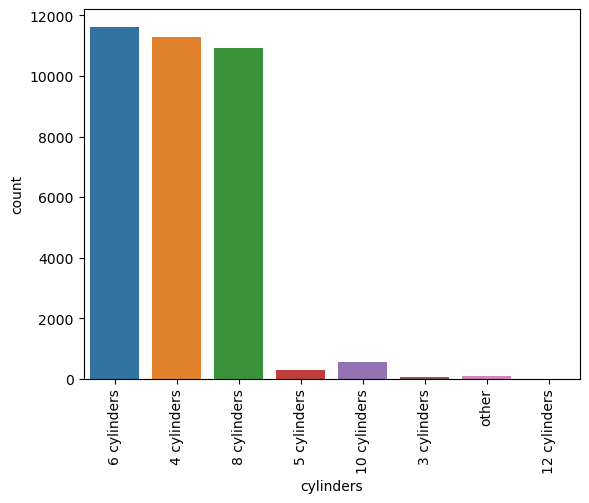

In [163]:
sns.countplot(data_raw, x="cylinders")
plt.xticks(rotation=90)

In [164]:
list_of_manufacturers = ["ford","chevrolet"]
list_of_condition = ["excellent","good","like new"]
list_of_fuel = ["gas"]
list_of_title = ["clean"]
list_of_type = ["SUV","sedan","truck"]
list_of_size = ["full-size","mid-size","compact"]
list_of_paint = ["red","blue","black","grey","silver","white"]
list_of_cylinders = ["4 cylinders","6 cylinders","8 cylinders"]
data_filtered= data_raw.query('manufacturer in @list_of_manufacturers and condition in @list_of_condition and fuel in @list_of_fuel and title_status in @list_of_title and type in @list_of_type and size in @list_of_size and paint_color in @list_of_paint and cylinders in @list_of_cylinders')

In [165]:
len(data_filtered)

6065

In [166]:
data_filtered = data_filtered.replace("4 cylinders", 4)
data_filtered = data_filtered.replace("6 cylinders", 6)
data_filtered = data_filtered.replace("8 cylinders", 8)

In [167]:
data_filtered.cylinders.unique()

array([6, 8, 4])

In [168]:
data_filtered = data_filtered.drop(['id', 'VIN', 'region','model','year','odometer','state'], axis=1)

In [169]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6065 entries, 337 to 426793
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         6065 non-null   int64 
 1   manufacturer  6065 non-null   object
 2   condition     6065 non-null   object
 3   cylinders     6065 non-null   int64 
 4   fuel          6065 non-null   object
 5   title_status  6065 non-null   object
 6   transmission  6065 non-null   object
 7   drive         6065 non-null   object
 8   size          6065 non-null   object
 9   type          6065 non-null   object
 10  paint_color   6065 non-null   object
dtypes: int64(2), object(9)
memory usage: 568.6+ KB


In [170]:
vehicle_data = pd.get_dummies(data_filtered)

In [171]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6065 entries, 337 to 426793
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   price                   6065 non-null   int64
 1   cylinders               6065 non-null   int64
 2   manufacturer_chevrolet  6065 non-null   uint8
 3   manufacturer_ford       6065 non-null   uint8
 4   condition_excellent     6065 non-null   uint8
 5   condition_good          6065 non-null   uint8
 6   condition_like new      6065 non-null   uint8
 7   fuel_gas                6065 non-null   uint8
 8   title_status_clean      6065 non-null   uint8
 9   transmission_automatic  6065 non-null   uint8
 10  transmission_manual     6065 non-null   uint8
 11  transmission_other      6065 non-null   uint8
 12  drive_4wd               6065 non-null   uint8
 13  drive_fwd               6065 non-null   uint8
 14  drive_rwd               6065 non-null   uint8
 15  size_compact     

<Axes: xlabel='cylinders', ylabel='price'>

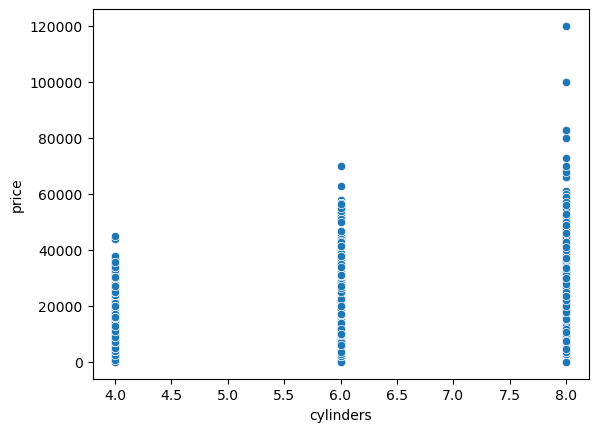

In [172]:
sns.scatterplot(data=vehicle_data, x="cylinders", y="price")

In [174]:
#Remove price outliers

q1 = vehicle_data["price"].quantile(0.25)
q3 = vehicle_data["price"].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr) 
print('Upper Limit:', upper_limit)
print('Lower Limit:', lower_limit)

vehicle_data = vehicle_data.loc[(vehicle_data["price"] < upper_limit) & (vehicle_data["price"] > lower_limit)]
print(len(vehicle_data))

Upper Limit: 49495.0
Lower Limit: -18505.0
5987


In [176]:
#Determine the correlation of price and various attributes 
price_corr = vehicle_data.corr()["price"] 
type(price_corr)
print(price_corr)

price                     1.000000
cylinders                 0.341582
manufacturer_chevrolet    0.011771
manufacturer_ford        -0.011771
condition_excellent      -0.096464
condition_good           -0.016383
condition_like new        0.175080
fuel_gas                       NaN
title_status_clean             NaN
transmission_automatic    0.094208
transmission_manual      -0.080722
transmission_other       -0.047765
drive_4wd                 0.264489
drive_fwd                -0.353396
drive_rwd                 0.066765
size_compact             -0.150344
size_full-size            0.321577
size_mid-size            -0.259199
type_SUV                 -0.135260
type_sedan               -0.343496
type_truck                0.406798
paint_color_black         0.024962
paint_color_blue         -0.063749
paint_color_grey         -0.051590
paint_color_red          -0.035970
paint_color_silver       -0.067378
paint_color_white         0.124221
Name: price, dtype: float64


In [177]:
#Split vehicle data into training and test data
X = vehicle_data.drop('price', axis = 1)
y = vehicle_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle = True)
print(len(X_train))
print(len(X_test))

4190
1797


In [178]:
all_indices = list(range(0, len(vehicle_data)))
all_indiced = random.shuffle(all_indices)
training_indices, dev_indices = np.split(all_indices, [4200])

In [189]:
#Sequential Feature Selection 

feature_select = SequentialFeatureSelector(estimator = LinearRegression(),
                                           scoring='neg_mean_squared_error',
                                           cv=[[training_indices, dev_indices]],
                                           n_features_to_select = 8)
best_features = pd.DataFrame(feature_select.fit_transform(X, y), 
                             columns = feature_select.get_feature_names_out())
print(best_features)

#Calculate MSEs 
best_features_sfs_model = LinearRegression()
best_features_sfs_model.fit(best_features.iloc[training_indices], vehicle_data.iloc[training_indices]["price"])

train_mse = mean_squared_error(best_features_sfs_model.predict(best_features.iloc[training_indices]),
                   vehicle_data.iloc[training_indices]["price"])
test_mse = mean_squared_error(best_features_sfs_model.predict(best_features.iloc[dev_indices]),
                   vehicle_data.iloc[dev_indices]["price"])

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

      condition_excellent  condition_like new  drive_4wd  size_compact  \
0                       1                   0          0             0   
1                       0                   0          1             0   
2                       1                   0          0             0   
3                       0                   1          0             0   
4                       0                   1          0             0   
...                   ...                 ...        ...           ...   
5982                    1                   0          0             0   
5983                    0                   0          1             0   
5984                    0                   1          1             0   
5985                    0                   1          0             1   
5986                    1                   0          0             0   

      size_full-size  type_SUV  type_truck  paint_color_red  
0                  1         0           1       

In [190]:
#Linear Regression Model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

param_df = pd.DataFrame([lm_model.coef_])
print(param_df)

train_mse_lm = mean_squared_error(lm_model.predict(X_train), y_train)                  
test_mse_lm = mean_squared_error(lm_model.predict(X_test), y_test)
print(f'Train MSE: {train_mse_lm}')
print(f'Test MSE: {test_mse_lm}')

          0             1             2             3             4   \
0 -39.757343 -7.111469e+15 -7.111469e+15  2.153222e+16  2.153222e+16   

             5             6             7             8             9   ...  \
0  2.153222e+16  2.171902e+15  1.035769e+14 -1.559153e+16 -1.559153e+16  ...   

             16            17            18            19            20  \
0 -2.964339e+16 -3.523147e+16 -3.523147e+16 -3.523147e+16  1.566752e+16   

             21            22            23            24            25  
0  1.566752e+16  1.566752e+16  1.566752e+16  1.566752e+16  1.566752e+16  

[1 rows x 26 columns]
Train MSE: 92324993.10095465
Test MSE: 86372012.7312187


In [191]:
#Ridge Regression
lm_ridge_model = Ridge(alpha = 10000)
lm_ridge_model.fit(X_train, y_train)

param_ridge_df = pd.DataFrame([lm_ridge_model.coef_])
print(param_ridge_df)

train_mse_ridge = mean_squared_error(lm_ridge_model.predict(X_train), y_train)                  
test_mse_ridge = mean_squared_error(lm_ridge_model.predict(X_test), y_test)
print(f'Train MSE: {train_mse_ridge}')
print(f'Test MSE: {test_mse_ridge}')

            0         1         2           3           4           5    6   \
0  1028.005912 -4.218087  4.218087 -154.984606 -110.679367  265.663973  0.0   

    7          8         9   ...          16          17          18  \
0  0.0  54.844054 -35.09402  ... -332.987998 -178.874443 -410.726849   

           19         20         21         22        23         24  \
0  589.601292  39.741491 -57.864849 -32.626375 -49.99502 -50.201155   

           25  
0  150.945908  

[1 rows x 26 columns]
Train MSE: 111184082.99818462
Test MSE: 103844127.2736885


In [192]:
#Calculate optimal alpha using GridSearchCV
scaled_ridge_model = Pipeline([('transformer', PolynomialFeatures(degree = 3, include_bias = False)),
                               ('scale', StandardScaler()),
                               ('regression', Ridge())
                              ])
parameters_to_try = {'regression__alpha' : 10**np.linspace(-2, 5, 100)}
model_finder = GridSearchCV(estimator = scaled_ridge_model, 
                            param_grid = parameters_to_try,
                            scoring = "neg_mean_squared_error",
                            cv = [[training_indices, dev_indices]])
model_finder.fit(X, y)

best_model = model_finder.best_estimator_
best_model

Pipeline(steps=[('transformer',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scale', StandardScaler()),
                ('regression', Ridge(alpha=642.807311728432))])

In [193]:
#Ridge Regression with alpha=642.807311728432
lm_ridge_model = Ridge(alpha = 642.807311728432)
lm_ridge_model.fit(X_train, y_train)

param_ridge_df = pd.DataFrame([lm_ridge_model.coef_])
print(param_ridge_df)

train_mse_ridge = mean_squared_error(lm_ridge_model.predict(X_train), y_train)                  
test_mse_ridge = mean_squared_error(lm_ridge_model.predict(X_test), y_test)
print(f'Train MSE: {train_mse_ridge}')
print(f'Test MSE: {test_mse_ridge}')

           0          1          2           3            4            5   \
0  743.045425  52.570362 -52.570362 -864.601098 -1510.025034  2374.626132   

    6    7           8           9   ...           16          17  \
0  0.0  0.0  614.768393 -282.382894  ... -1565.453838 -859.842101   

            18          19          20          21         22          23  \
0 -2065.739959  2925.58206  369.034987 -433.240858 -68.949953 -368.318133   

          24         25  
0  70.151447  431.32251  

[1 rows x 26 columns]
Train MSE: 96412743.11105633
Test MSE: 89728835.69931263


In [194]:
#Lasso Regression
vehicle_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias =False)),
                      ('scaler', StandardScaler()),
                      ('lasso', Lasso(random_state = 42)) 
                     ])
vehicle_pipe.fit(X_train, y_train)
lasso_coefs = vehicle_pipe.named_steps['lasso'].coef_

# Answer check
print(type(lasso_coefs))
print(lasso_coefs)
vehicle_pipe

lasso_train_mse = mean_squared_error(y_train, vehicle_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, vehicle_pipe.predict(X_test))

# Answer check
print('Training and Testing MSEs')
print(lasso_train_mse)
print(lasso_test_mse)

<class 'numpy.ndarray'>
[ 4.20150118e+03  8.50019247e+01 -9.37712914e-14 ...  0.00000000e+00
  0.00000000e+00 -0.00000000e+00]
Training and Testing MSEs
65585881.583579324
81093032.05828223


/Users/sheetalchaudhari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.506e+10, tolerance: 5.374e+07
  model = cd_fast.enet_coordinate_descent(
